In [62]:
import cv2
import numpy
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
def convertToRGB(img): 
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [64]:
#load test iamge
test1 = cv2.imread('test1.jpg')
#convert the test image to gray image as opencv face detector expects gray images 
gray_img = cv2.cvtColor(test1, cv2.COLOR_BGR2GRAY)

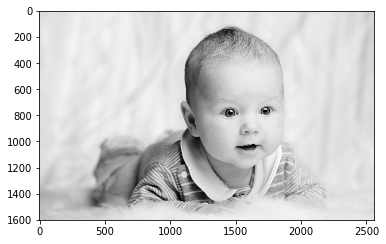

In [65]:
plt.imshow(gray_img, cmap='gray')

In [66]:
#cv2.imshow('Test Imag', gray_img) 
#cv2.waitKey(0) 
#cv2.destroyAllWindows()

In [67]:
#load cascade classifier training file for haarcascade 
haar_face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')

In [76]:
#let's detect multiscale (some images may be closer to camera than others) images 
faces = haar_face_cascade.detectMultiScale(gray_img, scaleFactor=1.3, minNeighbors=5) 

#print the number of faces found 
print('Faces found: ', len(faces))

Faces found:  1


In [77]:
#go over list of faces and draw them as rectangles on original colored 
for (x, y, w, h) in faces:
    cv2.rectangle(test1, (x, y), (x+w, y+h), (0, 255, 0), 2)

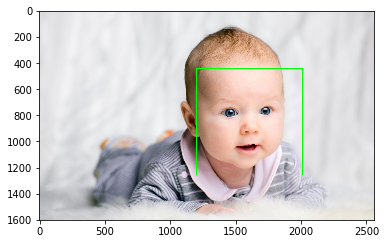

In [78]:
#convert image to RGB and show image 
plt.imshow(convertToRGB(test1))

# Making a function for this


In [59]:
def detect_faces(f_cascade, colored_img, scaleFactor = 1.1):
 #just making a copy of image passed, so that passed image is not changed 
 img_copy = colored_img.copy()          

 #convert the test image to gray image as opencv face detector expects gray images
 gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)          

 #let's detect multiscale (some images may be closer to camera than others) images
 faces = f_cascade.detectMultiScale(gray, scaleFactor=scaleFactor, minNeighbors=5);          

 #go over list of faces and draw them as rectangles on original colored img
 for (x, y, w, h) in faces:
      cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0, 255, 0), 2)              

 return img_copy

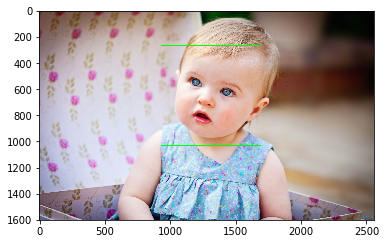

In [60]:
#load another image 
test2 = cv2.imread('test2.jpg')  
 
#call our function to detect faces 
faces_detected_img = detect_faces(haar_face_cascade, test2)  
 
#convert image to RGB and show image 
plt.imshow(convertToRGB(faces_detected_img))